#today we are having an exciting case study  Hr analytics case study and we would develop and extract insights from it


# Step 1: Importing of Libraries

In [ ]:
#Configuration Libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Mandatory libraires

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt




Other Libraries

In [ ]:
from sklearn.preprocessing import LabelEncoder


Data Loading and inspection

In [ ]:
df3=pd.read_csv('/content/people.csv')

In [ ]:
df3.head()

#Insights
We need to rename this column [timespent.company]

In [ ]:
df3['lastEvaluation']

In [ ]:
df3['timeSpent.company']

In [ ]:
df3.lastEvaluation

In [ ]:
df3.timespent.company          #we can't aceess this column so we need to rename it.

Shape Inspection

In [ ]:
a=df3.shape
print(f'There are {a[0]} rows and {a[1]} columns')

Information Phase

In [ ]:
df3.info()

# Insights :there is no null **values**

*   there is no null **values**
*   WE need to perform encoding



*   Duplicates check if there are any




# StatisticalInferencen:to get the statistical *idea*

In [ ]:
df3.describe()         #statistical analysis  of df3 dataset

In [ ]:
df3.describe().T                        #transpose of a matrix

#Insights
Satisfactory level column says that on  an average the satisfactory level column has 60 % level of satisfaction moreover it also seems to have a normal
distribution.


*   Left and work accident are not normal distribution may be right skewd graph
*   promotion in last 5 years may be a right skewed graph





In [ ]:
df3.describe(include=['O']).T

# Data Preprocessing

In [ ]:
df3.rename(columns={'timeSpent.company':'timespent_company'},inplace=True)

#Check for duplicates

In [ ]:
df3.duplicated().sum()

In [ ]:
df3=df3.drop_duplicates(keep='first')

#Encoding

In [ ]:
df3['dept'].unique()               #after encoding

In [ ]:
df3['salary'].unique()                 #after encoding

In [ ]:
col_list=['dept','salary']

In [ ]:
le=LabelEncoder()

In [ ]:
for x in col_list:
  df3[x]=le.fit_transform(df3[x])
  print(le.classes_)
  mapped=dict(zip(le.classes_,le.transform(le.classes_)))
  print(mapped)

#ShapeInspection

In [ ]:
a=df3.shape

In [ ]:
print(f"there are {a[0]} rows and {a[1]} columns")

Check for nulls

In [ ]:
df3.isnull().sum()

Step4 : Statistical Analysis Portion

In [ ]:
#Check using test that Satisfactory column  is normally distributed or not

In [ ]:
#Test for Normality:Shapiro wilk Test

In [ ]:
#visualise the satisfactory level

In [ ]:
plt.figure(figsize=(10,8))
plt.hist(df3['satisfactoryLevel'])
plt.show()

In [ ]:
#by looking at the graph  we can conclude that the graph is not normally distributed,it may be the left skewd graph.

Visualisation using seaborn

In [ ]:
sns.distplot(df3['satisfactoryLevel'])

In [ ]:
sns.kdeplot(x='satisfactoryLevel',data=df3)          #only the perfect distribution we are having

In [ ]:
#by looking at the graph  we can conclude that the graph is not normally distributed,it may be the left skewd graph.

Shapiro Wilks Test

In [ ]:
from scipy.stats import shapiro


**Framing the hypothesis**


* NUll Hypothesis:The data is normally distributed
*  Alternate Hypotheisis:THe data is not normally distributed.



In [ ]:
stats,pvalue=shapiro(df3['satisfactoryLevel'])

Results

In [ ]:
if pvalue>0.05:
  print('Accept the null hypothesis and will conclude that the data is normally distributed')

else:
  print('Failed to accept the null hypotheisis and will conclude that the data is not normally distributed')










2.)Create a filter of data when satisfactory level is from 0 to 0.50 . and time spent in the company is 2 years and avg montly hours is in between 130 to 200 hrs.


In [ ]:
df3[(df3['satisfactoryLevel']>0)& (df3['satisfactoryLevel']<0.50)& (df3['timeSpent.company']==2) & (df3['avgMonthlyHours']>130)& (df3['avgMonthlyHours']<200)]



*   Find the average of averagemonthlyhours
*   Find the data that is having thefilters


*   Then take a sample out of data
*   Perform the test

One Samplet test:It tells us whether the means the sample and the population are different or not


# Average Monthly hours of an employee having 2 years of experience is 167.Is it same for employees having more than  2 years of experience?
Condition -Satisfactory level of an employee is from 0 to 0.5 and average Monthly hours is from 130 -200 **

GET OUR DATA

In [ ]:
new_df=df3[((df3['satisfactoryLevel']>0) & (df3['satisfactoryLevel']<=0.50) & (df3['timeSpent.company']>2) & (df3['avgMonthlyHours']>=130) & (df3['avgMonthlyHours']<=200))]

In [ ]:
proposed_mean=167

In [ ]:
new_df

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low
7,0.42,0.53,2,142,3,0,1,0,sales,low
8,0.45,0.54,2,135,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14970,0.43,0.48,2,135,3,0,1,0,sales,medium
14971,0.42,0.48,2,143,3,0,1,0,sales,low
14979,0.37,0.46,2,149,3,0,1,0,marketing,high
14988,0.43,0.57,2,157,3,0,1,0,sales,low


Formulation of Alternate and Null hypothesis

*Null Hypothesis:Average Monthly hours of people having 2 years of experience and more than 2 years of experience  is exactly the same.
*  Alternate Hypothesis:Average Monthly working hours of people having 2 years of experience and more than 2 years of experience is not the same.



Samples

In [ ]:
sample_df=new_df.sample(100,random_state=0)



*   Implement the test(Test_1samp)
*   



In [ ]:
from scipy.stats import ttest_1samp

In [ ]:
_,p_value=ttest_1samp(sample_df['avgMonthlyHours'],proposed_mean)

In [ ]:
#conclusion

In [ ]:
if p_value>0.05:
  print('we can conclude that Average Monthly hours of people having 2 years of experience and more than 2 years of experience  is exactly the same.')
else:
  print('Failed to accept the null hypothesis :Average Monthly working hours of people having 2 years of experience and more than 2 years of experience is not the same.')



Failed to accept the null hypothesis :Average Monthly working hours of people having 2 years of experience and more than 2 years of experience is not the same.


# The Percentage of employee leaving the company is 3% having experience of 2 years.Is it same for employees having more than 2 years experience?

Condition:Satisfactory level of a employee is from 0 - 0.5 and average monthly hours is from 130-200.

In [ ]:
#FORMULATION  OF HYPOTHESIS
#





*  ** NULL HYPOTHESIS:H0:%OF EMPLOYEES  LEAVING THE COMPANY IS THE SAME FOR EMPLOYEE WITH 2 YEARS OF EXPERIENCE AND MORE THAN 2 YEARS EXERIENCE. **
*   **ALTERNATE HYPOTHESIS:%OF EMPLOYEES  LEAVING THE COMPANY IS  NOT THE SAME FOR EMPLOYEE WITH 2 YEARS OF EXPERIENCE AND MORE THAN 2 YEARS EXERIENCE**



sample out of data

In [ ]:
sample_df=new_df.sample(100,random_state=0)


In [ ]:
sample_df['left'].value_counts()

left
1    64
0    36
Name: count, dtype: int64

In [ ]:
nobs=len(sample_df['left'])

Proportion

In [ ]:
proposed_proportion=0.03

Manual Approach

In [ ]:
count=sample_df['left'].value_counts()/nobs



Implementation

In [ ]:
from statsmodels.stats.proportion import proportions_ztest
stats,p_value=proportions_ztest(count,nobs,proposed_proportion,alternative="two-sided")

if p_value>0.05:
  print('%OF EMPLOYEES LEAVING THE COMPANY IS THE SAME FOR EMPLOYEE WITH 2 YEARS OF EXPERIENCE AND MORE THAN 2 YEARS EXERIENCE. ')
else:
  print('We failed to accept the null hypothesis i.e % OF EMPLOYEES LEAVING THE COMPANY IS NOT THE SAME FOR EMPLOYEE WITH 2 YEARS OF EXPERIENCE AND MORE THAN 2 YEARS EXERIENCE')


% OF EMPLOYEES LEAVING THE COMPANY IS NOT THE SAME FOR EMPLOYEE WITH 2 YEARS OF EXPERIENCE AND MORE THAN 2 YEARS EXERIENCE


# Is the mean average monthly hours of an employee having experience 2 to 5 years is the same as that of an employee having exp 6 to 10 years.

Formulation of Hypothesis * Null Hypothesis:Mean Avg monthly hours of employee having experienceof 2 to 5 years is same as that of employee having experince 6 to 10 years.

Null Hypothesis:Mean Avg monthly hours of employee having experienceof 2 to 5 years is same as that of employee having experince 6 to 10 years.
** Alternate Hypothesis** :Mean Avg monthly hours of employee having experienceof 2 to 5 years is not the same as that of employee having experince 6 to 10 years.

**Grab the data**

In [ ]:
new_df1=df3[(df3['timeSpent.company']>=2) &((df3['timeSpent.company']<=5))]
new_df2=df3[(df3['timeSpent.company']>=6) &((df3['timeSpent.company']<=10))]


**Sampling**

In [ ]:
sample1=new_df1.sample(200,random_state=0)
sample2=new_df2.sample(200,random_state=0)


**Implement the test**

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
stats,p_value=ttest_ind(sample1['avgMonthlyHours'],sample2['avgMonthlyHours'])

**Conclusion**

In [ ]:

if p_value>0.05:
  print('We can conclude that Mean Avg monthly hours of employee having experienceof 2 to 5 years is same as that of employee having experince 6 to 10 years. ')
else:
  print('Mean Avg monthly hours of employee having experienceof 2 to 5 years is not the same as that of employee having experince 6 to 10 years. ')

Mean Avg monthly hours of employee having experienceof 2 to 5 years is not the same as that of employee having experince 6 to 10 years. 


Using the F test for the same problem

**F test for variance is used to testif the variance of two population are equal or not.**

**Sample Variance**

In [ ]:
var1=sample1['avgMonthlyHours'].var()
var2=sample2['avgMonthlyHours'].var()

F statistics

In [ ]:
from scipy.stats import f
F=var1/var2

In [ ]:
print(f'F-stats{F}')

F-stats0.9510146318634557


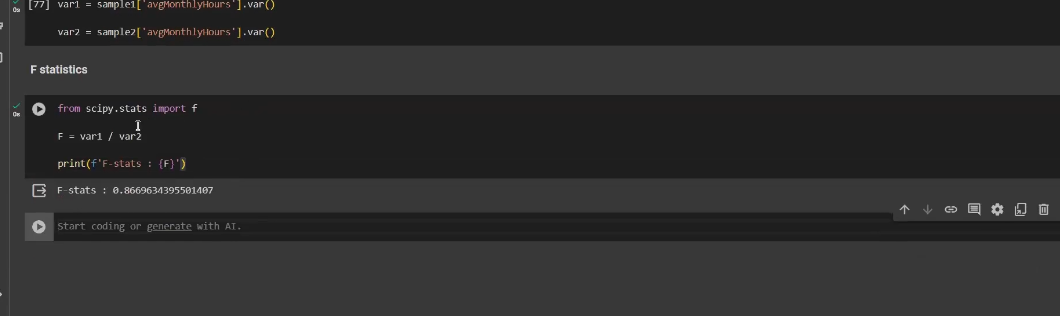

Degrees of freedom

In [ ]:
dof1=len(sample1)-1
dof2=len(sample2)-2

**Implementation**

In [ ]:
from scipy.stats import f

In [ ]:
f.cdf(F,dof1,dof2)

0.7752965573418765

Question for two tailed t test:We are working in a biscuit company.The weight of each biscuit is 10gm on an average.Now,one day employee notices the difference in weights of few biscuits and report to the quality assurance department.Now ,takingthis thing on a note,QA department conducts a test.Here they have taken a sample ,now they want to find out whether the average weight of the sample taken is same as population or not.



*  NUll hypothesis:The average weightis 10 grams
*  Alternate Hypotheisis:The average weightisnot 10gms



In [ ]:
import numpy  as np
from scipy import stats
#Population Size
n=100
#Population mean
mu=10
#standard deviation
sigma=5
#sample data
sample=np.random.normal(mu,sigma,30)

In [ ]:
sample

array([15.87271257, 12.44293144, -2.00660815,  9.02786972,  3.65404889,
        2.5460017 , 10.05319953,  9.34904727,  4.57340727,  6.80575351,
       10.21772699,  6.99891165, 14.19177754, 14.22343847,  5.50824191,
        1.41686873,  7.057633  , 13.47614386,  4.52484247,  9.02259662,
        9.67131681, 14.05847798, 11.45200549,  9.5053075 ,  1.75548829,
        6.20023155,  7.23431636, 10.70273489,  9.08612262,  3.52890767])

In [ ]:
#NULL hypothesis:THe average weiht of the sample is the same as the population mean
#Alternate hypothesis:The average weight of the sample  is different from the population mean.(two tailed)
#Perform two tailed t test
import numpy  as np
from scipy import stats
#Population Size
n=100
#Population mean
mu=10
#standard deviation
sigma=5
#sample data
sample=np.random.normal(mu,sigma,30)
t_statistic,p_value=stats.ttest_ind(sample,mu,alternative='two-sided')

#significance level
alpha=0.05
#Decision
if p_value<0.05:
  print('Reject the null hypothesis.The average weight of the sample is statistically different from the population mean')

else:
  print('Failed to reject the null hypothesis.There is not enough evidence to conclude the average weight of the sample is different fromn the population mean')


print('Here are the parameter results:,end=')
#print(f"Population_Mean:{mu}", f"\nstandard deviation:{sigma}",f"Sample Mean{sample.mean()}" ,f"T test value" {t_statistic} " P_value"{p_value}", "Level of significance{alpha}" )
print(f"Population_Mean:{mu}, \nstandard deviation:{sigma} , Sample Mean{sample.mean()} , T test value {t_statistic}  P_value{p_value} , Level of significance{alpha}" )

Failed to reject the null hypothesis.There is not enough evidence to conclude the average weight of the sample is different fromn the population mean
Here are the parameter results:,end=
Population_Mean:10, 
standard deviation:5 , Sample Mean10.913803358297477 , T test value 0.2317313344051666  P_value0.8183740929912939 , Level of significance0.05
